##### Group members: Nicole Huffman, Tien Duong

## Read me
- The dataset contains 45,811,883 user visits to the Today Module. For each visit, both the user and each of the candidate articles are associated with a feature vector of dimension 6 (including a constant feature), constructed by conjoint analysis with a bilinear model [1].
- Our dataset consists of User clicks taken from Yahoo's Front Page Today Module. They vary from different times of day.
- The different column names consists of:  
`. Timestamp (e.g., 1241160900) 
. Displayed_article_id (e.g., 109513)  
. User_click (0 for no-click and 1 for click)  
. Strings ("|user" and "|{article_id}" indicate the start of user and article features)  
. Features ("feature_id:feature_value" pairs, and feature_id starts from 1)`  
#### Objective:  
- A/B testing to determine the number of User clicks between different times.
- Will use a T-test to measure the differences.  
#### Hypothesis:  
- `Our hypothesis: There will be a significant difference in the number of User clicks depending on the day!`
- Null hypothesis: There is no significant difference between User clicks and time of day.
- Alternative hypothesis: There is a significant difference between User clicks and time of day.

In [2]:
# Importing libraries

#install.packages("data.table")
#install.packages("anytime")
#install.packages("pwr")
#install.packages("dplyr")
#install.packages("ggplot2")
library(data.table)
library(anytime)
library(pwr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [20]:
data <- read.csv('test_set_1') # Read in CSV files
data_2 <- read.csv('test_set_2')


In [21]:
head(data)
head(data_2)

,X,X1241160900,X109513,X0,X.user
,<int>,<chr>,<chr>,<chr>,<chr>
1,1,1241160900,109484,0,|user
2,2,1241160900,109495,0,|user
3,3,1241160900,109494,0,|user
4,4,1241160900,109492,0,|user
5,5,1241160900,109502,0,|user
6,6,1241160900,109473,0,|user


,X,X1241938500,X109766,X0,X.user
,<int>,<int>,<int>,<int>,<chr>
1,1,1241938500,109763,0,|user
2,2,1241938500,109764,0,|user
3,3,1241938500,109697,0,|user
4,4,1241938500,109723,0,|user
5,5,1241938500,109684,0,|user
6,6,1241938500,109697,0,|user


### Data Wrangling

#### - Dataset 1
1. We are going to convert the datatype to a timestamp  
2. Changing the column names to be distinguishable  
3. Drop all NA rows  
4. Convert all the user click display names to numeric  

#### - Dataset 2  
1. We are going to convert the datatype to a timestamp  
2. Changing the column names to be distinguishable  
3. Drop all NA rows  
4. Convert all the user click display names to numeric  

In [22]:
# Lets start with dataset 1

oldnames = c("X1241160900","X109513","X0","X.user")
newnames = c("datetime","display_id", "user_click", "type")

data <- data %>% rename_at(vars(oldnames), ~ newnames)
data <- data[complete.cases(data),] # drop all NA rows

In [23]:
head(data) # Checking to see if the code worked!

,X,datetime,display_id,user_click,type
,<int>,<chr>,<chr>,<chr>,<chr>
1,1,1241160900,109484,0,|user
2,2,1241160900,109495,0,|user
3,3,1241160900,109494,0,|user
4,4,1241160900,109492,0,|user
5,5,1241160900,109502,0,|user
6,6,1241160900,109473,0,|user


In [24]:
# Converting date time (to datetime), user clicks and display_id (to numeric)

data$datetime <- anytime(as.numeric(data$datetime))
data$user_click <- as.numeric(as.character(data$user_click))
data$display_id <- as.numeric(as.character(data$display_id))

Warning message in anytime(as.numeric(data$datetime)):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


---

In [26]:
# Repeat for dataset 2

oldnames_2 = c("X1241938500","X109766","X0","X.user")
newnames_2 = c("datetime","display_id", "user_click", "type")

data_2<- data_2 %>% rename_at(vars(oldnames_2), ~ newnames_2)

In [27]:
data_2$datetime <- anytime(as.numeric(data_2$datetime))
data_2$user_click <- as.numeric(as.character(data_2$user_click))
data_2$display_id <- as.numeric(as.character(data_2$display_id))
data_2 <- data_2[complete.cases(data_2),]

### Visualization
. Plot dataset 1 and 2 with date time and user clicks

In [30]:
plot_1 <- data %>% group_by(datetime) %>% 
summarize(f = sum(user_click ))
plot_1 <- data_frame(plot_1)

`summarise()` ungrouping output (override with `.groups` argument)



In [31]:
plot_1

datetime,f
<dttm>,<dbl>
2009-04-30 23:55:00,56
2009-05-01 00:00:00,218
2009-05-01 00:05:00,217
2009-05-01 00:10:00,197
2009-05-01 00:15:00,198
2009-05-01 00:20:00,157
2009-05-01 00:25:00,210
2009-05-01 00:30:00,46
NA,NA


Warning message:
“Use of `plot_1$datetime` is discouraged. Use `datetime` instead.”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


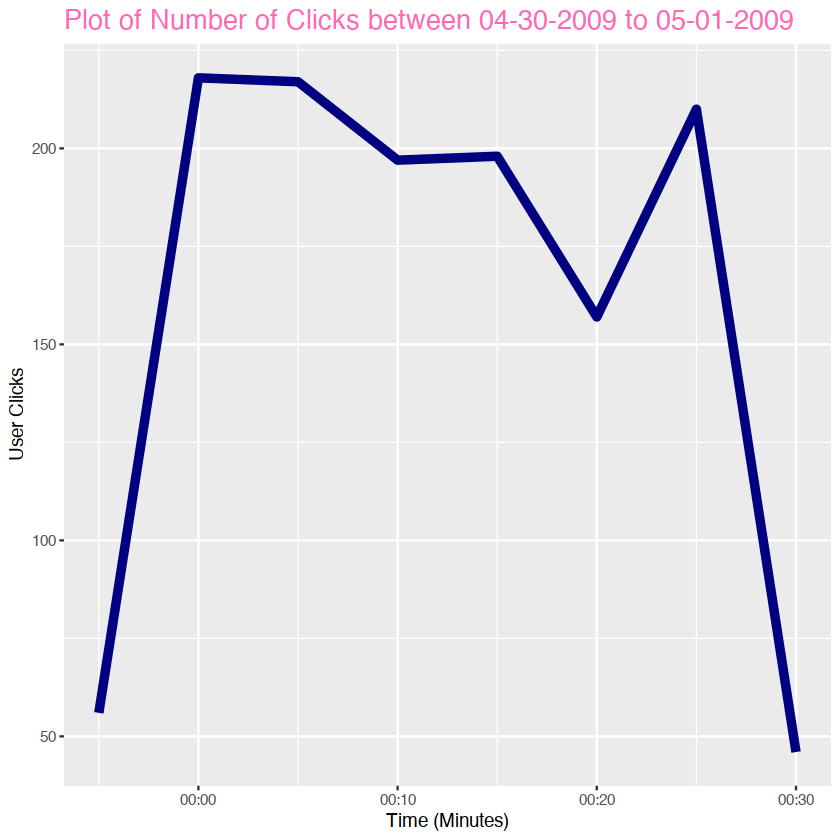

In [58]:
plot_1$datetime <- as.POSIXct(plot_1$datetime, format="%H:%M:%S")
p <- ggplot(data=plot_1, aes(plot_1$datetime,f)) + geom_line(color="navy",size=2)

p + ggtitle("Plot of Number of Clicks between 04-30-2009 to 05-01-2009") +
  xlab("Time (Minutes)") + ylab("User Clicks") + theme(plot.title = element_text(color="hot pink", size=16, face="bold.italic")) 

In [39]:
plot_2 <- data_2 %>% group_by(datetime) %>%
summarize(f = sum(user_click ))
plot_2 <- data_frame(plot_2)

`summarise()` ungrouping output (override with `.groups` argument)



In [40]:
plot_2

datetime,f
<dttm>,<dbl>
2009-05-09 23:55:00,44
2009-05-10 00:00:00,191
2009-05-10 00:05:00,187
2009-05-10 00:10:00,162
2009-05-10 00:15:00,163
2009-05-10 00:20:00,155
2009-05-10 00:25:00,157
2009-05-10 00:30:00,153


Warning message:
“Use of `plot_2$datetime` is discouraged. Use `datetime` instead.”


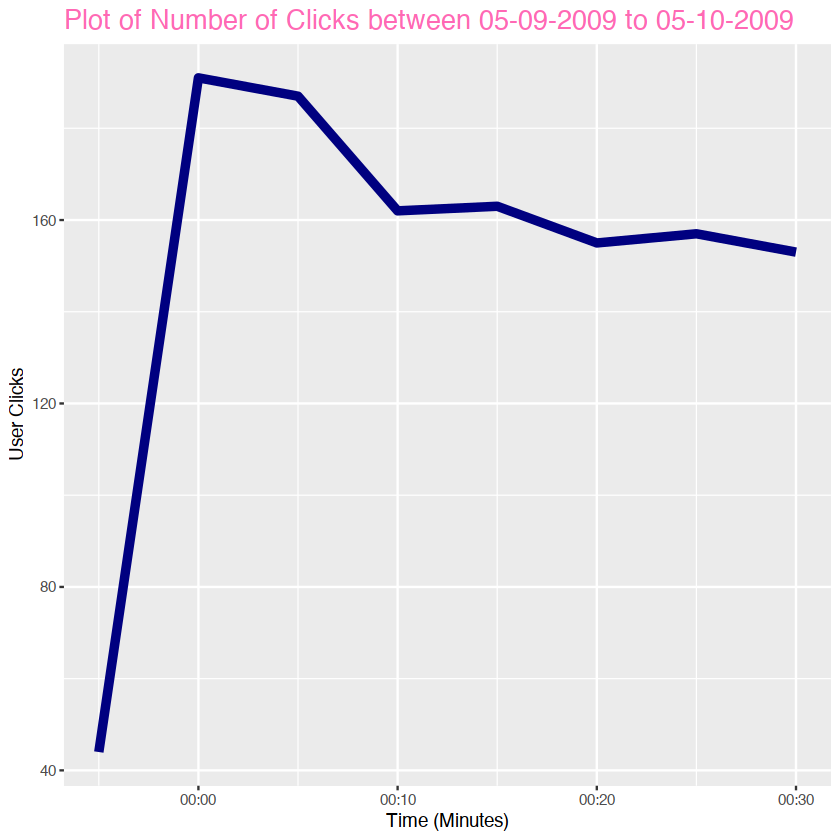

In [59]:
plot_2$datetime <- as.POSIXct(plot_2$datetime, format="%H:%M:%S")
p2 <- ggplot(data=plot_2, aes(plot_2$datetime,f)) + geom_line(color="navy",size=2)

p2 + ggtitle("Plot of Number of Clicks between 05-09-2009 to 05-10-2009") +
  xlab("Time (Minutes)") + ylab("User Clicks") + theme(plot.title = element_text(color="hot pink", size=16, face="bold.italic"))

Based on the visualization of these two datasets, there are significantly more user clicks in dataset 1 (Between 04-30-2009 to 05-01-2009) than in dataset 2 (Between 05-09-2009 to 05-10-2009). However, there was a steep decline in clicks by the end of 30 minutes shown in dataset 1 as opposed to dataset 2, where the trend was more stable/consistent.

### Testing
. Add up all the user clicks and grouped by display ID  
. Arranged numbers by total clicks  

In [74]:
group_1 <- data %>% group_by(display_id) %>%
summarise(total_click = sum(user_click)) %>% arrange(total_click)
group_1 <- na.omit(group_1) # Excluding NA rows
group_1

`summarise()` ungrouping output (override with `.groups` argument)



display_id,total_click
<dbl>,<dbl>
109519,11
109492,24
109515,33
109501,39
109495,41
109498,52
109512,57
109453,60
109506,62


In [75]:
group_2 <- data_2 %>% group_by(display_id) %>%
summarise(total_click = sum(user_click)) %>% arrange(total_click)
group_2 <- na.omit(group_2) # Excluding NA rows
group_2

`summarise()` ungrouping output (override with `.groups` argument)



display_id,total_click
<dbl>,<dbl>
109723,35
109764,36
109697,37
109760,40
109756,46
109767,48
109741,49
109763,54
109731,56


In [76]:
# Created a new column for version 1 and version 2

group_1$version <- 'group_1'
group_2$version <- 'group_2'

In [83]:
testing <- rbind(group_1,group_2) # Combined the two groups together
# testing <- testing[c(1:57),]

In [85]:
testing %>% # Summarized the statistics of the groups
group_by(version) %>%
  summarise(
    count = n(),
    mean = mean(total_click, na.rm = TRUE),
    sd = sd(total_click, na.rm = TRUE)
  )

`summarise()` ungrouping output (override with `.groups` argument)



version,count,mean,sd
<chr>,<int>,<dbl>,<dbl>
group_1,21,61.85714,21.36653
group_2,20,60.60000,17.24254


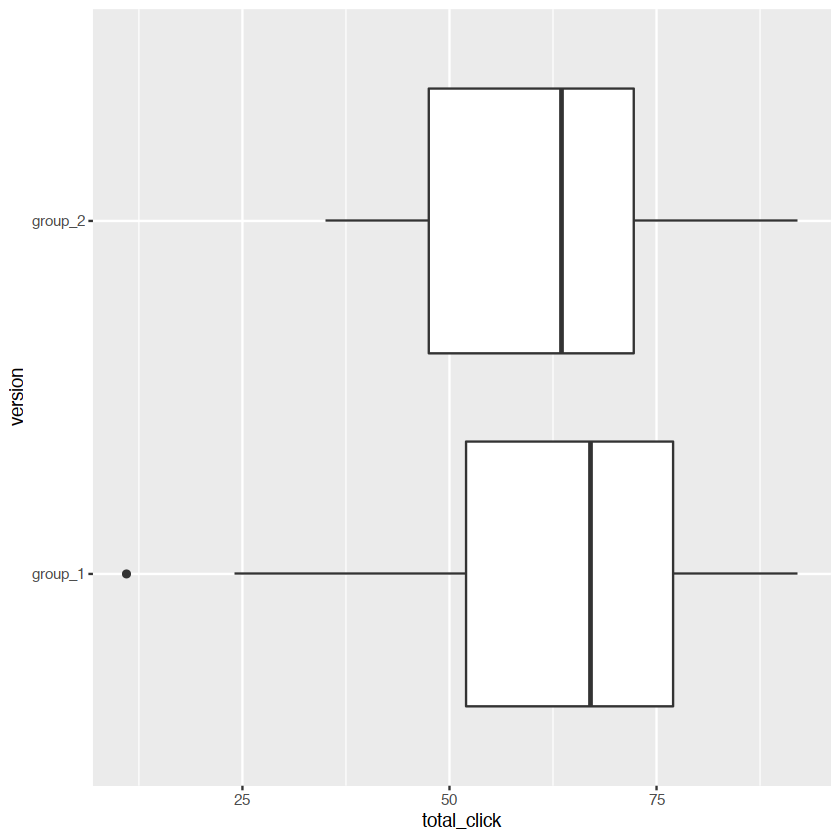

In [86]:
# Now lets run a boxplot for fun!

ggplot(testing, aes(total_click, version)) + 
	geom_boxplot()

In [87]:
# T-test

t.test(total_click~version, data=testing)


	Welch Two Sample t-test

data:  total_click by version
t = 0.20779, df = 38, p-value = 0.8365
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.99081  13.50510
sample estimates:
mean in group group_1 mean in group group_2 
             61.85714              60.60000 


### Results

We rejected the null hypothesis, which stated that there was no significant difference between User clicks and time of day. Our findings supported the alternative hypothesis and what we predicted, which means that there is a significant difference on the number of clicks based upon a 30 minute interval and the time of day, t(38)= 0.2079, p<.05.